<a href="https://colab.research.google.com/github/thanhquye/Traffic-sign-classification/blob/huuquy/vgg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:



import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from tensorflow import keras
from PIL import Image
import os
import pathlib
import random as rn
from sklearn.model_selection import train_test_split
import tensorflow_hub as hub
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, array_to_img, load_img
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.applications import VGG19
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from sklearn.metrics import accuracy_score

In [ ]:
from google.colab import drive
from google.colab import files
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd '/content/drive/MyDrive/Machine_Learning/Project'

/content/drive/MyDrive/Machine_Learning/Project


In [ ]:
train_path = './Train'
test_path = './Test'
test_df = pd.read_csv('Test.csv')


In [ ]:
height = 50
width = 50
batch_size = 128
seed = 42

In [ ]:
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)',
            2:'Speed limit (50km/h)',
            3:'Speed limit (60km/h)',
            4:'Speed limit (70km/h)',
            5:'Speed limit (80km/h)',
            6:'End of speed limit (80km/h)',
            7:'Speed limit (100km/h)',
            8:'Speed limit (120km/h)',
            9:'No passing',
            10:'No passing veh over 3.5 tons',
            11:'Right-of-way at intersection',
            12:'Priority road',
            13:'Yield',
            14:'Stop',
            15:'No vehicles',
            16:'Veh > 3.5 tons prohibited',
            17:'No entry',
            18:'General caution',
            19:'Dangerous curve left', 20:'Dangerous curve right',
            21:'Double curve',
            22:'Bumpy road',
            23:'Slippery road',
            24:'Road narrows on the right',
            25:'Road work',
            26:'Traffic signals',
            27:'Pedestrians',
            28:'Children crossing',
            29:'Bicycles crossing',
            30:'Beware of ice/snow',
            31:'Wild animals crossing',
            32:'End speed + passing limits',
            33:'Turn right ahead',
            34:'Turn left ahead',
            35:'Ahead only',
            36:'Go straight or right',  37:'Go straight or left',
            38:'Keep right',
            39:'Keep left',
            40:'Roundabout mandatory',
            41:'End of no passing',
            42:'End no passing veh > 3.5 tons' }

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   validation_split=0.2)
train_dataset = train_datagen.flow_from_directory(train_path,
                                                  target_size=(height, width),
                                                  batch_size=batch_size,
                                                  class_mode='categorical',
                                                  shuffle=True,
                                                  seed=seed,
                                                  color_mode='rgb',
                                                  interpolation='hamming',
                                                  subset='training')

Found 31368 images belonging to 43 classes.


In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255,
                                  validation_split=0.2)
test_dataset = test_datagen.flow_from_directory(train_path,
                                                target_size=(height, width),
                                                batch_size=batch_size,
                                                class_mode='categorical',
                                                shuffle=True,
                                                seed=seed,
                                                color_mode='rgb',
                                                interpolation='hamming',
                                                subset='validation')

Found 7841 images belonging to 43 classes.


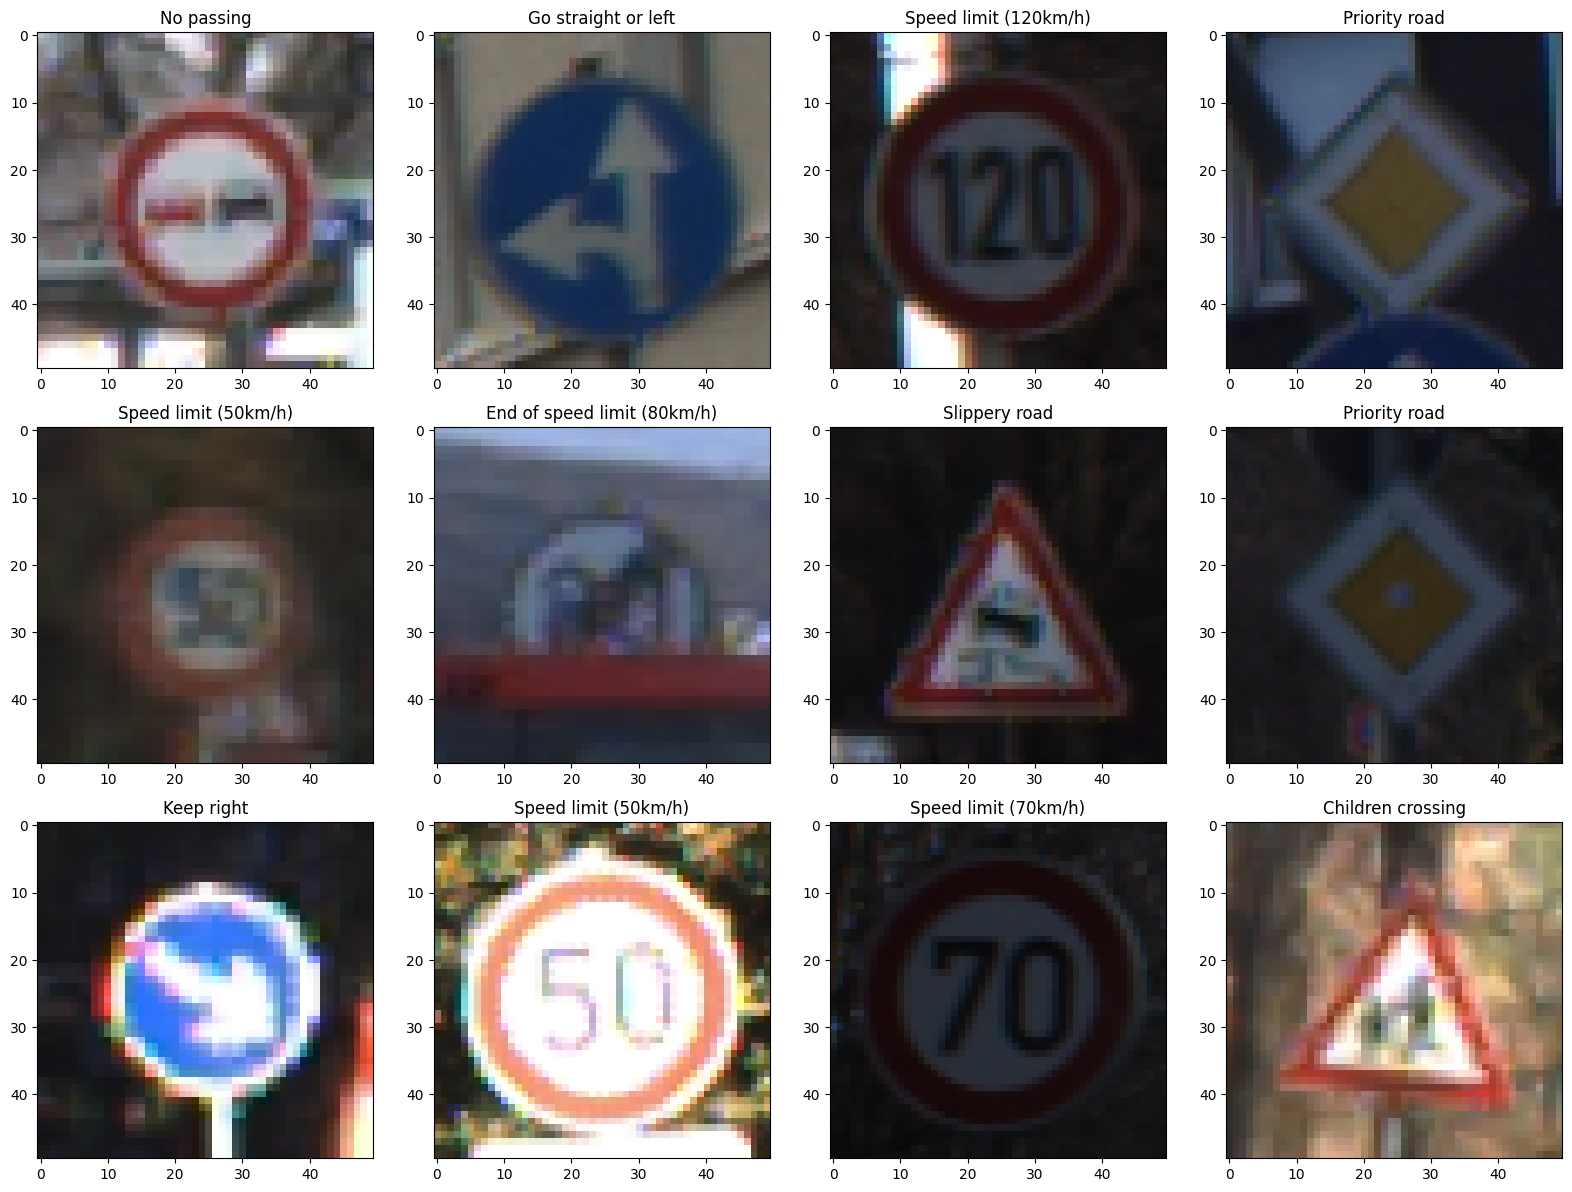

In [ ]:
fig,ax=plt.subplots(3,4)
fig.set_size_inches(16,12)
img,y = train_dataset.next()
for i in range(3):
    for j in range (4):
        l=rn.randint(0,batch_size-1)
        label = classes[int(list(train_dataset.class_indices.keys())[np.argmax(y[l])])]
        ax[i,j].imshow(img[l])
        ax[i,j].set_title(label)

plt.tight_layout()

In [ ]:
classes = sorted(os.listdir(train_path), key=int)

In [ ]:
# Get the number of images for each class
class_counts = {}
for class_num in classes:
    class_path = os.path.join(train_path, class_num)
    class_count = len(os.listdir(class_path))
    class_counts[class_num] = class_count

In [ ]:
# Get the total number of images in the dataset
total_count = sum(class_counts.values())

In [ ]:
# Get the number of images for train, test, and validation sets
train_count = int(total_count * 0.8)  # 80% for training
test_count = int(total_count * 0.1)  # 10% for testing
val_count = total_count - train_count - test_count  # Remaining for validation

In [ ]:
# Calculate the percentages
train_percent = (train_count / total_count) * 100
test_percent = (test_count / total_count) * 100
val_percent = (val_count / total_count) * 100


In [ ]:
# Print the information
print("Total Images:", total_count)
print("Images per Class:")
for class_num in classes:
    count = class_counts[class_num]
    print(f"Class {class_num}: {count}")
print("Train Images:", train_count, f"({train_percent:.2f}%)")
print("Test Images:", test_count, f"({test_percent:.2f}%)")
print("Validation Images:", val_count, f"({val_percent:.2f}%)")

Total Images: 39209
Images per Class:
Class 0: 210
Class 1: 2220
Class 2: 2250
Class 3: 1410
Class 4: 1980
Class 5: 1860
Class 6: 420
Class 7: 1440
Class 8: 1410
Class 9: 1470
Class 10: 2010
Class 11: 1320
Class 12: 2100
Class 13: 2160
Class 14: 780
Class 15: 630
Class 16: 420
Class 17: 1110
Class 18: 1200
Class 19: 210
Class 20: 360
Class 21: 330
Class 22: 390
Class 23: 510
Class 24: 270
Class 25: 1500
Class 26: 600
Class 27: 240
Class 28: 540
Class 29: 270
Class 30: 450
Class 31: 780
Class 32: 240
Class 33: 689
Class 34: 420
Class 35: 1200
Class 36: 390
Class 37: 210
Class 38: 2070
Class 39: 300
Class 40: 360
Class 41: 240
Class 42: 240
Train Images: 31367 (80.00%)
Test Images: 3920 (10.00%)
Validation Images: 3922 (10.00%)


In [ ]:
vgg_model = tf.keras.Sequential([VGG19(weights='imagenet', include_top=False, input_shape=(height,width,3)),
                                 keras.layers.BatchNormalization(),
                                 keras.layers.Flatten(),
                                 keras.layers.Dense(512, activation='sigmoid'),
                                 keras.layers.Dense(43, activation='softmax')
                                ])

80134624/80134624 [==============================] - 1s 0us/step


In [ ]:
vgg_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 1, 1, 512)         20024384  
                                                                 
 batch_normalization (Batch  (None, 1, 1, 512)         2048      
 Normalization)                                                  
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 512)               262656    
                                                                 
 dense_1 (Dense)             (None, 43)                22059     
                                                                 
Total params: 20311147 (77.48 MB)
Trainable params: 20310123 (77.48 MB)
Non-trainable params: 1024 (4.00 KB)
_____________

In [ ]:
alpha=0.0001
epochs=3
optim = keras.optimizers.Adam(learning_rate=alpha)
vgg_model.compile(optimizer = optim, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
total_train_samples = len(train_dataset) * batch_size
batch_size = total_train_samples / len(train_dataset)
print(f"batch size = {batch_size}")

batch size = 128.0


In [ ]:
vgg_history = vgg_model.fit(train_dataset,
                        steps_per_epoch=len(train_dataset),
                        epochs=epochs,
                        validation_data=test_dataset,
                        validation_steps=len(test_dataset))

Epoch 1/3
246/246 [==============================] - 13607s 55s/step - loss: 0.7008 - accuracy: 0.8517 - val_loss: 0.3787 - val_accuracy: 0.9784
Epoch 2/3
246/246 [==============================] - 5576s 23s/step - loss: 0.0566 - accuracy: 0.9921 - val_loss: 0.0962 - val_accuracy: 0.9782
Epoch 3/3
246/246 [==============================] - 5532s 22s/step - loss: 0.0247 - accuracy: 0.9963 - val_loss: 0.0700 - val_accuracy: 0.9844


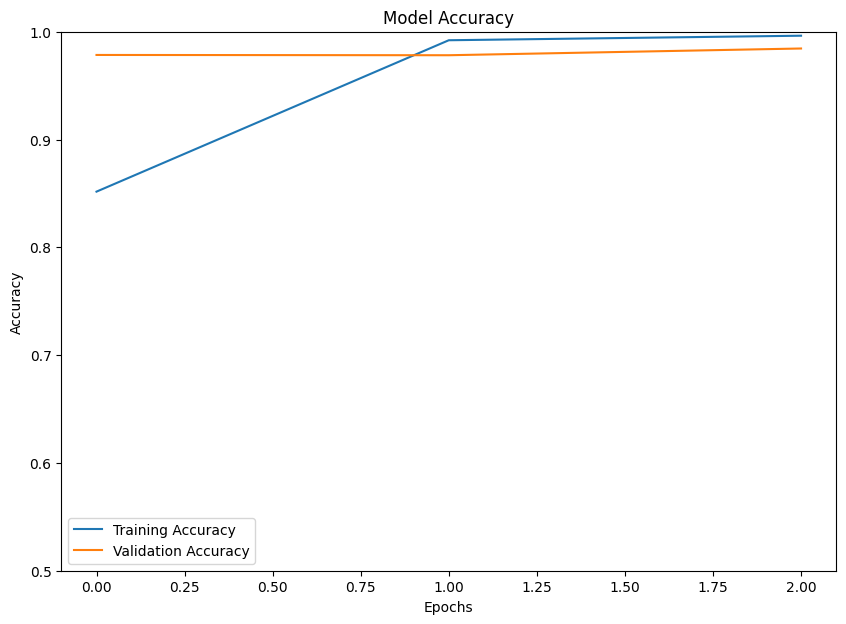

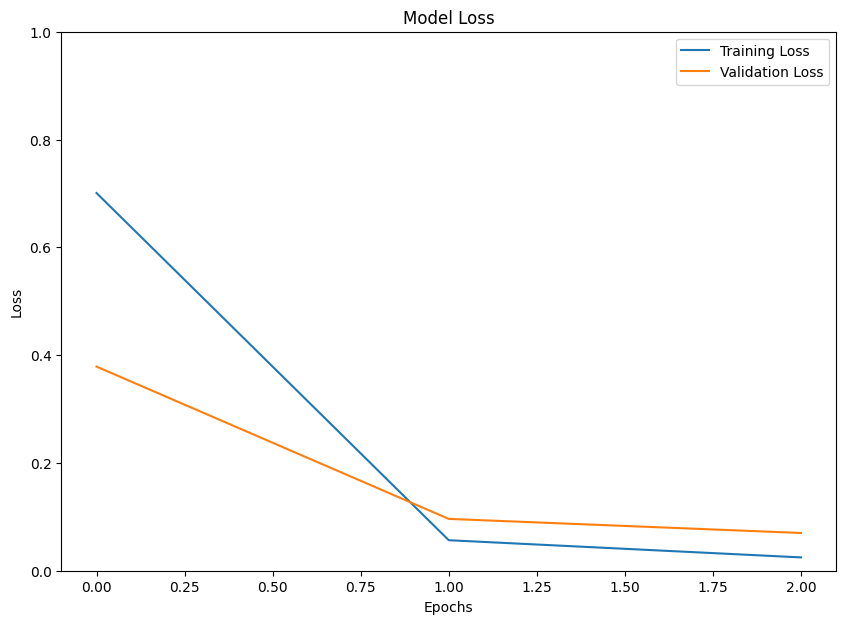

In [ ]:
# Plotting accuracy
plt.figure(figsize=(10, 7))
plt.plot(vgg_history.history['accuracy'])
plt.plot(vgg_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.ylim(0.5, 1)
plt.show()

# Plotting loss
plt.figure(figsize=(10, 7))
plt.plot(vgg_history.history['loss'])
plt.plot(vgg_history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.ylim(0, 1)
plt.show()

In [ ]:
vgg_model.save("VGG.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
def map_pred(pred):
    return [int(list(train_dataset.class_indices.keys())[i]) for i in pred]
test_df = pd.read_csv('Test.csv')

test_labels = test_df["ClassId"].values
imgs = test_df["Path"].values

data =[]

for img in imgs:
    try:
        image = cv2.imread(img)
        image_fromarray = Image.fromarray(image, 'RGB')
        resize_image = image_fromarray.resize((height, width))
        data.append(np.array(resize_image))
    except:
        print("Error in " + img)
X_test = np.array(data)
X_test = X_test/255

4/4 [==============================] - 6s 2s/step


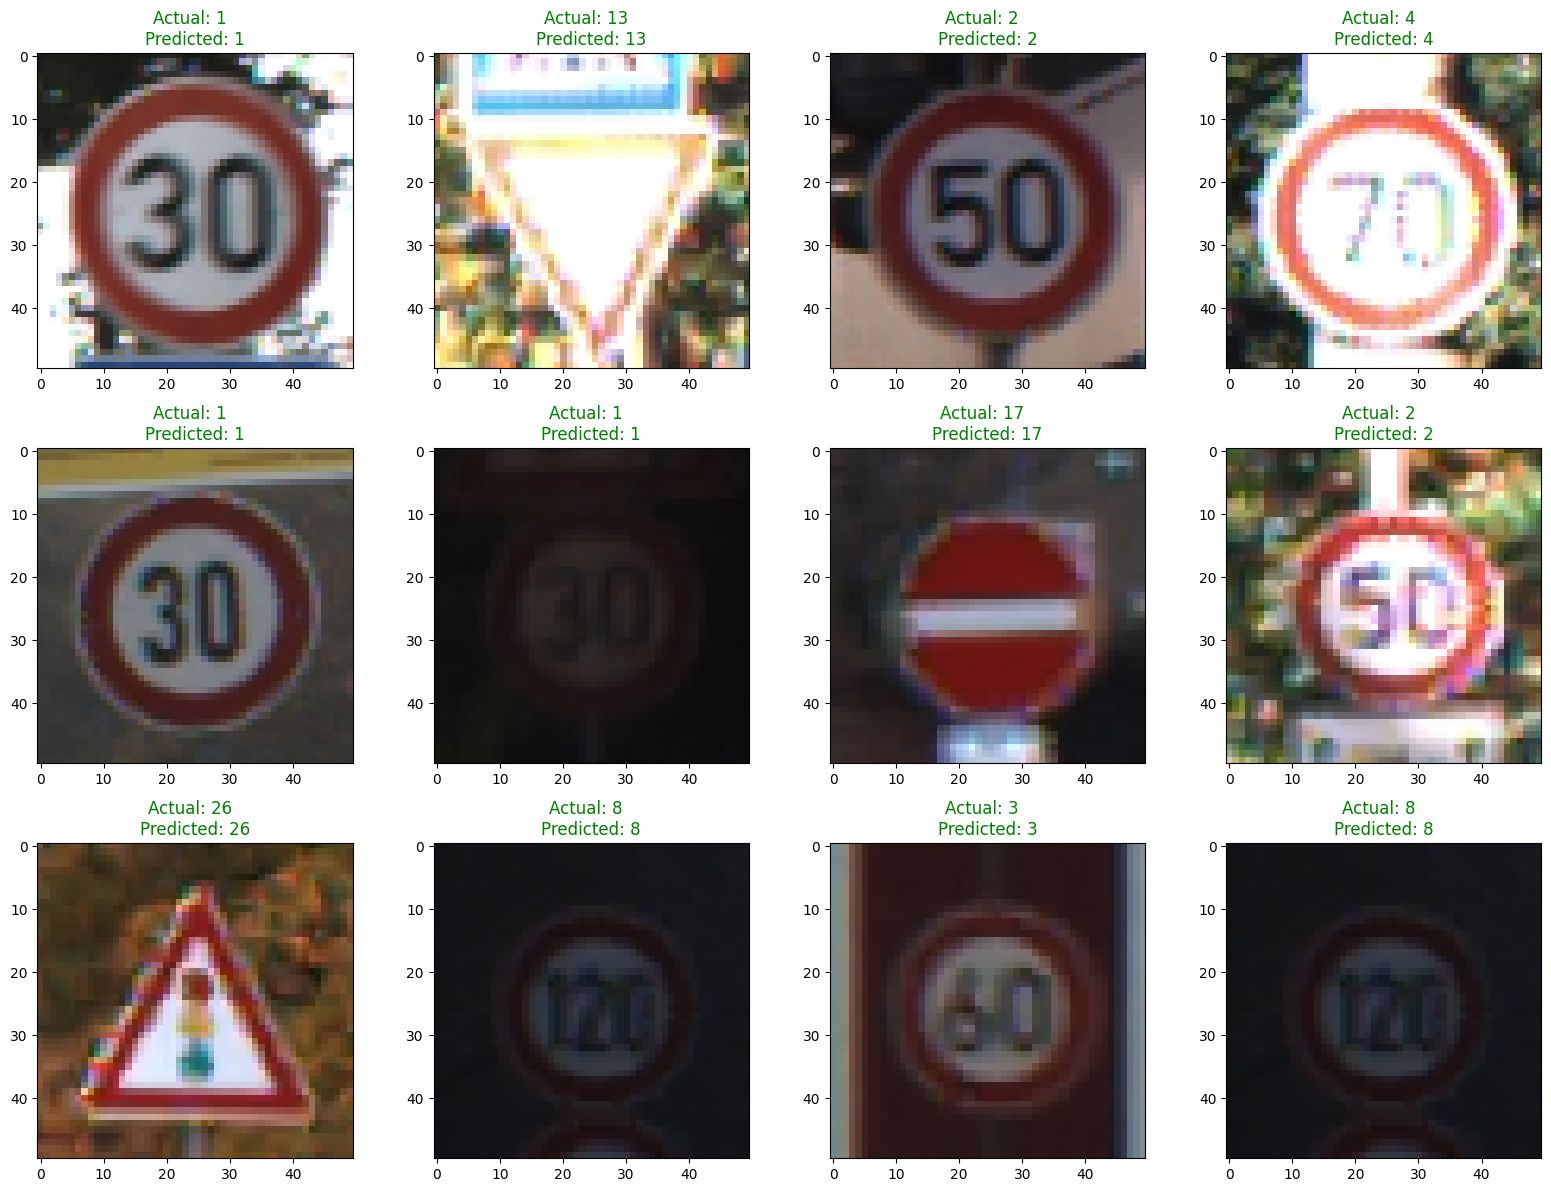

In [ ]:
fig,ax=plt.subplots(3,4)
fig.set_size_inches(16,12)
val_images, val_labels = test_dataset.next()
predicted = vgg_model.predict(val_images)
predicts = map_pred(np.argmax(predicted, axis=-1))
labels = map_pred(np.argmax(val_labels, axis=-1))

for i in range(3):
    for j in range (4):
        idx=rn.randint(0,batch_size-1)
        ax[i,j].imshow(val_images[idx])
        if labels[idx] == predicts[idx]:
            ax[i,j].set_title('Actual: '+classes[labels[idx]]+'  \nPredicted: '+classes[predicts[idx]], color = 'green')
        else:
            ax[i,j].set_title('Actual: '+classes[labels[idx]]+'  \nPredicted: '+classes[predicts[idx]], color = 'red')

plt.tight_layout()

In [ ]:
from sklearn.metrics import accuracy_score
pred = vgg_model.predict(X_test)
pred = map_pred(pred.argmax(axis=-1))
print('Test Data accuracy: ',accuracy_score(test_labels, pred)*100)

395/395 [==============================] - 476s 1s/step
Test Data accuracy:  84.98812351543943


In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

AttributeError: 'list' object has no attribute 'values'

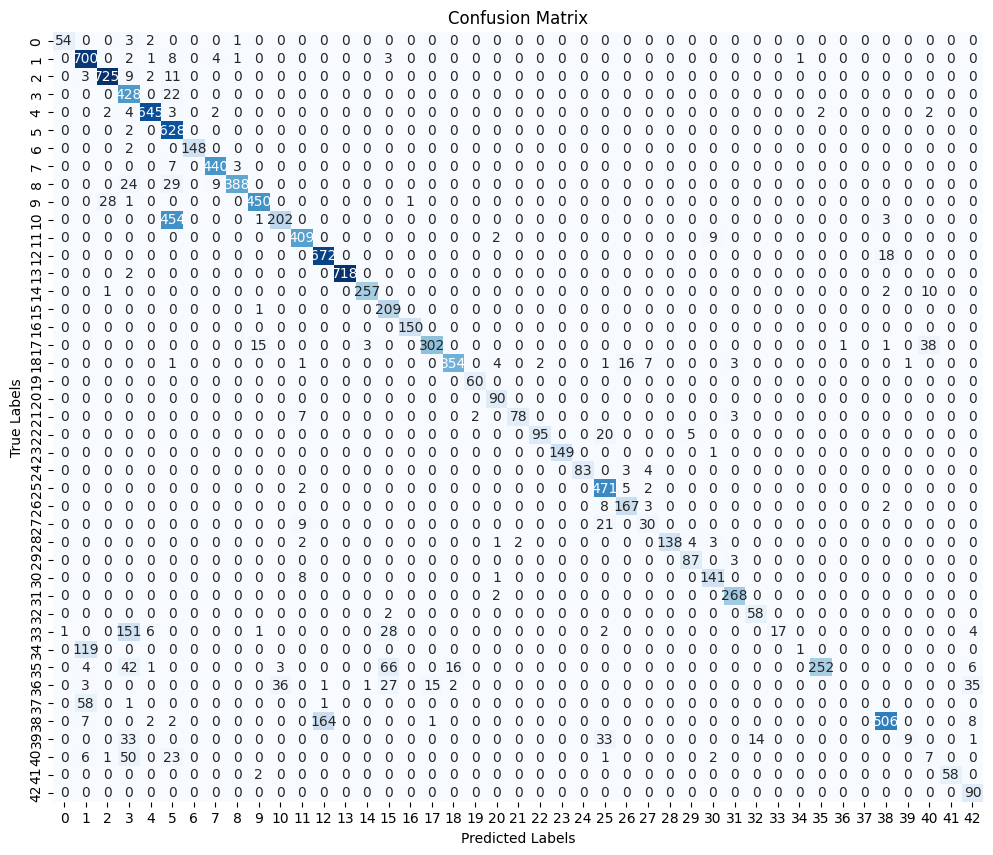

In [ ]:
# Calculate confusion matrix
cm = confusion_matrix(test_labels, pred)

# Plot confusion matrix
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.xticks(np.arange(len(classes)), classes.values(), rotation=90)
plt.yticks(np.arange(len(classes)), classes.values())
plt.show()

In [ ]:
from sklearn.metrics import classification_report

# Convert test labels to one-hot encoding
test_labels_encoded = to_categorical(test_labels, num_classes=43)

# Predict labels for the test dataset using the VGG model
test_predictions_vgg = vgg_model.predict(X_test)
test_predictions_vgg_encoded = to_categorical(map_pred(test_predictions_vgg.argmax(axis=-1)), num_classes=43)

# Calculate metrics for the test dataset using the VGG model
test_report_vgg = classification_report(test_labels_encoded, test_predictions_vgg_encoded)

print("Test Dataset (VGG model):")
print(test_report_vgg)

395/395 [==============================] - 476s 1s/step
Test Dataset (VGG model):
              precision    recall  f1-score   support

           0       0.98      0.90      0.94        60
           1       0.78      0.97      0.86       720
           2       0.96      0.97      0.96       750
           3       0.57      0.95      0.71       450
           4       0.98      0.98      0.98       660
           5       0.53      1.00      0.69       630
           6       1.00      0.99      0.99       150
           7       0.97      0.98      0.97       450
           8       0.99      0.86      0.92       450
           9       0.96      0.94      0.95       480
          10       0.84      0.31      0.45       660
          11       0.93      0.97      0.95       420
          12       0.80      0.97      0.88       690
          13       1.00      1.00      1.00       720
          14       0.98      0.95      0.97       270
          15       0.62      1.00      0.77       210

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
